In [99]:
import scipy as sp
from scipy import stats
import numpy as np
import matplotlib.pylab as plt

import seaborn as sns
sns.set()


In [2]:
# p 작으면 확실히 틀린것 , p크면 틀렸다고 할 수 없는 것 (너말이 맞았다가 아님)
# 너가 한 말이 맞는데 나를 지지하는 결과의 데이터가 나올 확률
# p밸류 높으면 : 너말이 맞는데 내말이 맞을 가능성도 높다.

In [ ]:
# 49번보다 더 극단적으로 나올 확률이 92%이다.

In [5]:
N = 100
theta_0 = 0.35
np.random.seed(0)
x = sp.stats.bernoulli(theta_0).rvs(N)
n = np.count_nonzero(x)
n

31

N = 10이고 유의 수준이 10%라면 앞면이 나온 횟수가 몇 번이어야지 동전이 fair하지 않다고 이야기 할 수 있을까?

In [70]:
N = 1000
theta_0 = 0.5
np.random.seed(0)
x = sp.stats.bernoulli(theta_0).rvs(N)
n = np.count_nonzero(x)
n

483

In [74]:
sp.stats.binom_test(2, 10), sp.stats.binom_test(8, 10)

(0.10937500000000003, 0.10937500000000003)

In [73]:
sp.stats.binom_test(1, 10), sp.stats.binom_test(9, 10)

(0.021484374999999997, 0.021484374999999997)

In [72]:
sp.stats.binom_test(474,1000), sp.stats.binom_test(526,1000)

(0.10674954203435372, 0.10674954203435372)

In [75]:
sp.stats.binom_test(473,1000), sp.stats.binom_test(527,1000)

(0.09368729147551143, 0.09368729147551143)

In [93]:
# 데이터가 많아질 수록 fair하다고 할 수 있는 영역이 적어진다.

다음 코드를 실행하면 어느 식당의 판매 기록을 구할 수 있다. 이 데이터는 성별, 흡연유무, 점심/저녁 유무 등을 포함한다. 각 레코드는 한명의 손님을 나타낸다고 가정하자. 이항 검정을 사용하여 다음 문제를 풀어라.

In [94]:
tips = sns.load_dataset("tips")

In [95]:
tips.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [89]:
df1 = tips.groupby(by=["sex","smoker"]).size().reset_index(name="counts")

In [90]:
df1

,sex,smoker,counts
0,Male,Yes,60
1,Male,No,97
2,Female,Yes,33
3,Female,No,54


In [102]:
smoker = tips.groupby(by="smoker").size().reset_index(name="counts")

In [103]:
smoker

,smoker,counts
0,Yes,93
1,No,151


In [83]:
# 여자 손님 중 비흡연자가 흡연자보다 많다고 할 수 있는가?

In [96]:
sp.stats.binom_test(54, 87)

0.031418110233846136

In [84]:
# 저녁에 오는 여자 손님 중 비흡연자가 흡연자보다 많다고 할 수 있는가?

In [91]:
df2 = tips.groupby(by=["sex","smoker","time"]).size().reset_index(name="counts")

In [92]:
df2

,sex,smoker,time,counts
0,Male,Yes,Lunch,13
1,Male,Yes,Dinner,47
2,Male,No,Lunch,20
3,Male,No,Dinner,77
4,Female,Yes,Lunch,10
5,Female,Yes,Dinner,23
6,Female,No,Lunch,25
7,Female,No,Dinner,29


In [97]:
sp.stats.binom_test(29, 52)

0.4884556693798922

#### 카이제곱 검정
- - -


In [105]:
# 스칼라가 되어야 검정 통계량이 된다. 카테고리컬 데이터의 
# 저게 카이스퀘어분포 따르게 된다. 오차 제곱의 합이기 때문에 카이스퀘어와 비슷하게 된다.
# 4면체 주사위를 10번 던진다.

In [109]:
N = 10
K = 4
theta_0 = np.array([0.25, 0.25, 0.25, 0.25])
np.random.seed(0)
x = np.random.choice(K, N, p=theta_0)
n = np.bincount(x, minlength=K)
n

array([0, 3, 5, 2])

In [112]:
sp.stats.chisquare(n)

Power_divergenceResult(statistic=5.199999999999999, pvalue=0.157724450396663)

In [113]:
obs = np.array([[10, 10, 20], [20, 20, 20]])
sp.stats.chi2_contingency(obs)

(2.7777777777777777, 0.24935220877729622, 2, array([[12., 12., 16.],
        [18., 18., 24.]]))

In [114]:
## 0.24 25% 충분히 나올수 있고 x가 y에 영향을 미치지 못한다.
# chi2_contingency 

obs = np.array([[10, 10, 20], [20, 20, 20]])
sp.stats.chi2_contingency(obs)

In [115]:
import seaborn as sns
tips = sns.load_dataset("tips")
tips.pivot_table(index="sex", columns="day", aggfunc="size")

day,Thur,Fri,Sat,Sun
sex,,,,
Male,30,10,59,58
Female,32,9,28,18


In [118]:
obs = np.array([[30,10,59,58], [32,9,28,18]])
sp.stats.chi2_contingency(obs)

(13.22200137240661,
 0.004180302092822257,
 3,
 array([[39.89344262, 12.22540984, 55.9795082 , 48.90163934],
        [22.10655738,  6.77459016, 31.0204918 , 27.09836066]]))

#### 단일 표본 z검정
- - -
시그마 제곱 알고 있다고 가정하는 경우, 현실에서 안쓰인다.
시험에만 나온다.


#### 단일 표본 t검정
- - -

/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


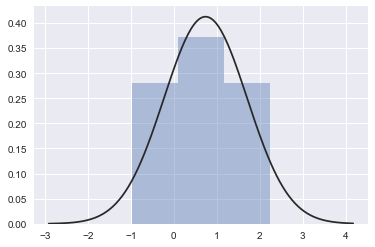

In [119]:
N = 10
mu_0 = 0
np.random.seed(0)
x = sp.stats.norm(mu_0).rvs(N)
sns.distplot(x, kde=False, fit=sp.stats.norm)
plt.show()

In [ ]:
# 원래 귀무가설 맞는데 검정 결과는 거짓이라고 말하는 것 type a erro

In [ ]:
# 독립분포 2개가 있는데 뮤가 같은지 다른지

/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


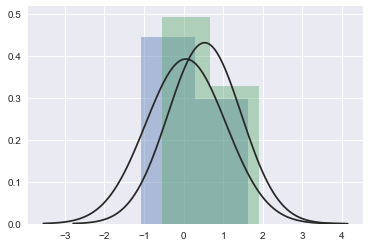

In [121]:
N = 5
mu_1 = 0
mu_2 = 0.5 # 뮤1, 뮤2 같다고 나옴, 오류 
np.random.seed(1)
x1 = sp.stats.norm(mu_1).rvs(N)
x2 = x1 + sp.stats.norm(mu_2, 0.1).rvs(N)
sns.distplot(x1, kde=False, fit=sp.stats.norm)
sns.distplot(x2, kde=False, fit=sp.stats.norm)
plt.show()

In [ ]:
# 60점 61점 나왔을 때 61점이라고 우리반이 더 잘한다고 하는 것은 

In [ ]:
### 대응 표본 t-검정 (Paired-two-sample t-test) : 한 반의 같은 학생이 2번 시험을 쳤을때 pair가 있는 데이터

In [ ]:
## 확률 분포가 정규분포에서 나온 것인지 아닌지 테스트 하는 것

# 모든 검정 중 가장 중요하다 제일 많이 쓰인다.

In [ ]:
# omnibus normality test ~ 8개 이름 외우면 된다.

모든 분포 종류에 사용 가능하다. : Kolmogorov-Smirnov test 
여러가지 많이 사용해보고 많은 분포들이 가리키는 값을 사용해야한다.